In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import matplotlib.lines as mlines
import seaborn as sns
from datetime import date
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_excel('project_data.xlsx', sheet_name = 'ERCIP', header = 1, usecols=lambda x: 'Unnamed' not in x)

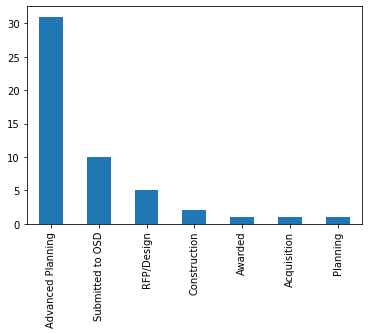

In [4]:
#reomve completed and cancelled projects
df_current = df[df['Status'] != 'Complete']
df_current = df_current[df_current['Status'] != 'Cancelled']
df_current['Status'].value_counts().plot(kind = 'bar')
plt.show()

In [5]:
#take subset of columns with date date
df_relevant = df_current[df_current['Fiscal Year of Appropriation'] <= 2024]
df_relevant.columns

Index(['Fiscal Year of Appropriation', 'Installation ', 'Project #',
       'Project Title', 'Status', 'Next Steps ', 'MCICOM GF-PW Action',
       'Notes / Additional Information', 'Project Description',
       'Mission Alignment', 'Initial Submission Amount (Planning 1391) ($000)',
       'President's Budget Amount (Budget Ready 1391) ($000)',
       'Original Authorized Amount ($000)', 'Current Authorized Amount ($000)',
       'Current Working Estimate ($000)', 'Amount Awarded ($000)',
       'Initial Submission Amount (Planning 1391) ($000).1',
       'President's Budget Amount (Budget Ready 1391) ($000).1',
       'Original Authorized Amount ($000).1',
       'Current Authorized Amount ($000).1',
       'Current Working Estimate ($000).1', 'Appropriation Allocated ($000)',
       'Amount Awarded ($000).1', 'Construction Agent', 'Acquisition Strategy',
       'Congressional Authorization', 'Final Design Authority (FDA)',
       'Design Direction (from Project Sponsor)',
       'RF

In [6]:
#convert columns to datetime
date_columns = ['Final Design Authority (FDA)', 'Design Direction (from Project Sponsor)', 'RFP for D/B RFP Complete (D/B RFP Award)', 
               'D/B RFP Start','35% Design', 'D/B RFP Complete', 'Contract Award \n(D/B Award)', 'Construction Start Date',  
               'Construction Completion Date (CCD)', 'Beneficial Occupancy Date (BOD)', 'Full Operational Capability (FOC)']

for col in date_columns:
    df_relevant[col] = pd.to_datetime(df_relevant[col])
df_relevant.head()

,Fiscal Year of Appropriation,Installation,Project #,Project Title,Status,Next Steps,MCICOM GF-PW Action,Notes / Additional Information,Project Description,Mission Alignment,...,Design Direction (from Project Sponsor),RFP for D/B RFP Complete (D/B RFP Award),D/B RFP Start,35% Design,D/B RFP Complete,Contract Award \n(D/B Award),Construction Start Date,Construction Completion Date (CCD),Beneficial Occupancy Date (BOD),Full Operational Capability (FOC)
24,2018,MCB Camp Lejeune,P-1487,Camp Johnson Microgrid,Construction,Finish construction,None,Cost increase for construction award covered u...,Provide microgrid with upgraded electrical inf...,This project supports mission assurance and re...,...,2019-02-01,2020-11-19,2020-11-19,2021-04-02,2022-07-21,2022-09-29,2023-06-01,2025-12-15,2025-12-15,2025-12-15
27,2019,MCAS Beaufort,P-505,Electrical Hardening and Black Start CHP System,RFP/Design,"J&A, Legal Sufficiency Review, and Finish IGA",Continue to engage in J&A and legal sufficienc...,In design via UESC IGA,Minimize risk of Station-wide power outage by ...,This project supports mission assurance and re...,...,NaT,2020-02-14,2020-02-14,2020-11-11,2023-04-28,2023-06-30,2024-04-01,2027-04-01,2027-04-01,2027-04-01
29,2019,MWTC Bridgeport,P-480,MWTC Bridgeport Energy Resilience Phase 1 & 2,Awarded,"Award P-481, Phase 2 low voltage work.",None,Cost increase covered using cancelled funds fr...,Modernize electrical system to enhance system ...,This project supports mission assurance and re...,...,2020-03-01,2020-06-09,2020-06-09,2020-08-06,2023-04-04,2023-04-19,2024-01-19,2026-01-17,2026-01-17,2026-01-17
30,2020,MCAS Camp Pendleton,P-143,Advanced Microgrid Infrastructure Improvement,Acquisition,Determine how to move forward.,Engage with MCAS CP / MCIWEST to determine pat...,NaN,Build Station micro-grid by integrating existi...,This project supports mission assurance and re...,...,NaT,2020-02-14,2020-02-14,2021-04-09,2021-11-30,2023-02-01,2023-12-01,2025-12-01,2025-12-01,2025-12-01
31,2020,MCAS Miramar,P-266,Additional Water Supply for Resilience,Construction,Finish construction,None,Cost increase covered using cancelled funds fr...,Mitigate water quality issues in East Miramar ...,This project supports mission assurance and re...,...,NaT,2019-11-22,2019-11-22,2020-01-15,2020-05-15,2020-11-03,2020-12-01,2023-03-10,2023-03-10,2023-03-10


In [7]:
vis_title = []
for index, row in df_relevant.iterrows():
    title = 'FY' + str(row['Fiscal Year of Appropriation'])[-2:] + ' ' + row['Project #']
    vis_title.append(title)
df_relevant['Vis Title'] = vis_title

In [8]:
df_relevant.head()

,Fiscal Year of Appropriation,Installation,Project #,Project Title,Status,Next Steps,MCICOM GF-PW Action,Notes / Additional Information,Project Description,Mission Alignment,...,RFP for D/B RFP Complete (D/B RFP Award),D/B RFP Start,35% Design,D/B RFP Complete,Contract Award \n(D/B Award),Construction Start Date,Construction Completion Date (CCD),Beneficial Occupancy Date (BOD),Full Operational Capability (FOC),Vis Title
24,2018,MCB Camp Lejeune,P-1487,Camp Johnson Microgrid,Construction,Finish construction,None,Cost increase for construction award covered u...,Provide microgrid with upgraded electrical inf...,This project supports mission assurance and re...,...,2020-11-19,2020-11-19,2021-04-02,2022-07-21,2022-09-29,2023-06-01,2025-12-15,2025-12-15,2025-12-15,FY18 P-1487
27,2019,MCAS Beaufort,P-505,Electrical Hardening and Black Start CHP System,RFP/Design,"J&A, Legal Sufficiency Review, and Finish IGA",Continue to engage in J&A and legal sufficienc...,In design via UESC IGA,Minimize risk of Station-wide power outage by ...,This project supports mission assurance and re...,...,2020-02-14,2020-02-14,2020-11-11,2023-04-28,2023-06-30,2024-04-01,2027-04-01,2027-04-01,2027-04-01,FY19 P-505
29,2019,MWTC Bridgeport,P-480,MWTC Bridgeport Energy Resilience Phase 1 & 2,Awarded,"Award P-481, Phase 2 low voltage work.",None,Cost increase covered using cancelled funds fr...,Modernize electrical system to enhance system ...,This project supports mission assurance and re...,...,2020-06-09,2020-06-09,2020-08-06,2023-04-04,2023-04-19,2024-01-19,2026-01-17,2026-01-17,2026-01-17,FY19 P-480
30,2020,MCAS Camp Pendleton,P-143,Advanced Microgrid Infrastructure Improvement,Acquisition,Determine how to move forward.,Engage with MCAS CP / MCIWEST to determine pat...,NaN,Build Station micro-grid by integrating existi...,This project supports mission assurance and re...,...,2020-02-14,2020-02-14,2021-04-09,2021-11-30,2023-02-01,2023-12-01,2025-12-01,2025-12-01,2025-12-01,FY20 P-143
31,2020,MCAS Miramar,P-266,Additional Water Supply for Resilience,Construction,Finish construction,None,Cost increase covered using cancelled funds fr...,Mitigate water quality issues in East Miramar ...,This project supports mission assurance and re...,...,2019-11-22,2019-11-22,2020-01-15,2020-05-15,2020-11-03,2020-12-01,2023-03-10,2023-03-10,2023-03-10,FY20 P-266


### Timeline Visualization

In [9]:
#create an array of projects
rel_projects = np.array(df_relevant['Project #'])
vis_cols = ['Vis Title','Fiscal Year of Appropriation','Project #','Final Design Authority (FDA)','D/B RFP Start','35% Design','Contract Award \n(D/B Award)','Construction Start Date','Construction Completion Date (CCD)']
df_vis = df_relevant[df_relevant['Project #'] == rel_projects][vis_cols]
df_vis.head(10)

,Vis Title,Fiscal Year of Appropriation,Project #,Final Design Authority (FDA),D/B RFP Start,35% Design,Contract Award \n(D/B Award),Construction Start Date,Construction Completion Date (CCD)
24,FY18 P-1487,2018,P-1487,2019-02-06,2020-11-19,2021-04-02,2022-09-29,2023-06-01,2025-12-15
27,FY19 P-505,2019,P-505,NaT,2020-02-14,2020-11-11,2023-06-30,2024-04-01,2027-04-01
29,FY19 P-480,2019,P-480,2020-02-01,2020-06-09,2020-08-06,2023-04-19,2024-01-19,2026-01-17
30,FY20 P-143,2020,P-143,2019-09-01,2020-02-14,2021-04-09,2023-02-01,2023-12-01,2025-12-01
31,FY20 P-266,2020,P-266,2019-02-01,2019-11-22,2020-01-15,2020-11-03,2020-12-01,2023-03-10
32,FY21 P-1238,2021,P-1238,2020-02-12,2021-07-08,2022-05-01,2024-01-31,2024-11-01,2026-11-01
33,FY22 P-281,2022,P-281,2022-04-19,2022-06-02,2022-11-01,2023-08-03,2024-05-01,2026-05-01
34,FY23 P-481,2023,P-481,2021-09-30,2021-12-09,2023-02-01,2024-01-17,2024-10-17,2026-10-17
35,FY24 P-283,2024,P-283,2022-12-01,2023-02-01,2023-06-01,2024-07-01,2024-12-01,2026-12-01


In [10]:
df_vis = df_vis[df_vis['Project #'] != 'P-505']
df_vis.sort_values(by = 'Fiscal Year of Appropriation', inplace = True)
df_vis.head(10)

,Vis Title,Fiscal Year of Appropriation,Project #,Final Design Authority (FDA),D/B RFP Start,35% Design,Contract Award \n(D/B Award),Construction Start Date,Construction Completion Date (CCD)
24,FY18 P-1487,2018,P-1487,2019-02-06,2020-11-19,2021-04-02,2022-09-29,2023-06-01,2025-12-15
29,FY19 P-480,2019,P-480,2020-02-01,2020-06-09,2020-08-06,2023-04-19,2024-01-19,2026-01-17
30,FY20 P-143,2020,P-143,2019-09-01,2020-02-14,2021-04-09,2023-02-01,2023-12-01,2025-12-01
31,FY20 P-266,2020,P-266,2019-02-01,2019-11-22,2020-01-15,2020-11-03,2020-12-01,2023-03-10
32,FY21 P-1238,2021,P-1238,2020-02-12,2021-07-08,2022-05-01,2024-01-31,2024-11-01,2026-11-01
33,FY22 P-281,2022,P-281,2022-04-19,2022-06-02,2022-11-01,2023-08-03,2024-05-01,2026-05-01
34,FY23 P-481,2023,P-481,2021-09-30,2021-12-09,2023-02-01,2024-01-17,2024-10-17,2026-10-17
35,FY24 P-283,2024,P-283,2022-12-01,2023-02-01,2023-06-01,2024-07-01,2024-12-01,2026-12-01


In [11]:
df_vis['B1'] = df_vis['D/B RFP Start'] - df_vis['Final Design Authority (FDA)']
df_vis['B2'] = df_vis['35% Design'] - df_vis['D/B RFP Start'] 
df_vis['B3'] = df_vis['Contract Award \n(D/B Award)'] - df_vis['35% Design'] 
df_vis['B4'] = df_vis['Construction Start Date'] - df_vis['Contract Award \n(D/B Award)'] 
df_vis['B5'] = df_vis['Construction Completion Date (CCD)'] - df_vis['Construction Start Date'] 
df_vis['B1'] = df_vis['B1'].dt.days
df_vis['B2'] = df_vis['B2'].dt.days
df_vis['B3'] = df_vis['B3'].dt.days
df_vis['B4'] = df_vis['B4'].dt.days
df_vis['B5'] = df_vis['B5'].dt.days
df_vis['Start'] = df_vis['Final Design Authority (FDA)'] - min(df_vis['Final Design Authority (FDA)'])
df_vis['Start'] = df_vis['Start'].dt.days 
df_vis.head(10)

,Vis Title,Fiscal Year of Appropriation,Project #,Final Design Authority (FDA),D/B RFP Start,35% Design,Contract Award \n(D/B Award),Construction Start Date,Construction Completion Date (CCD),B1,B2,B3,B4,B5,Start
24,FY18 P-1487,2018,P-1487,2019-02-06,2020-11-19,2021-04-02,2022-09-29,2023-06-01,2025-12-15,652,134,545,245,928,5
29,FY19 P-480,2019,P-480,2020-02-01,2020-06-09,2020-08-06,2023-04-19,2024-01-19,2026-01-17,129,58,986,275,729,365
30,FY20 P-143,2020,P-143,2019-09-01,2020-02-14,2021-04-09,2023-02-01,2023-12-01,2025-12-01,166,420,663,303,731,212
31,FY20 P-266,2020,P-266,2019-02-01,2019-11-22,2020-01-15,2020-11-03,2020-12-01,2023-03-10,294,54,293,28,829,0
32,FY21 P-1238,2021,P-1238,2020-02-12,2021-07-08,2022-05-01,2024-01-31,2024-11-01,2026-11-01,512,297,640,275,730,376
33,FY22 P-281,2022,P-281,2022-04-19,2022-06-02,2022-11-01,2023-08-03,2024-05-01,2026-05-01,44,152,275,272,730,1173
34,FY23 P-481,2023,P-481,2021-09-30,2021-12-09,2023-02-01,2024-01-17,2024-10-17,2026-10-17,70,419,350,274,730,972
35,FY24 P-283,2024,P-283,2022-12-01,2023-02-01,2023-06-01,2024-07-01,2024-12-01,2026-12-01,62,120,396,153,730,1399


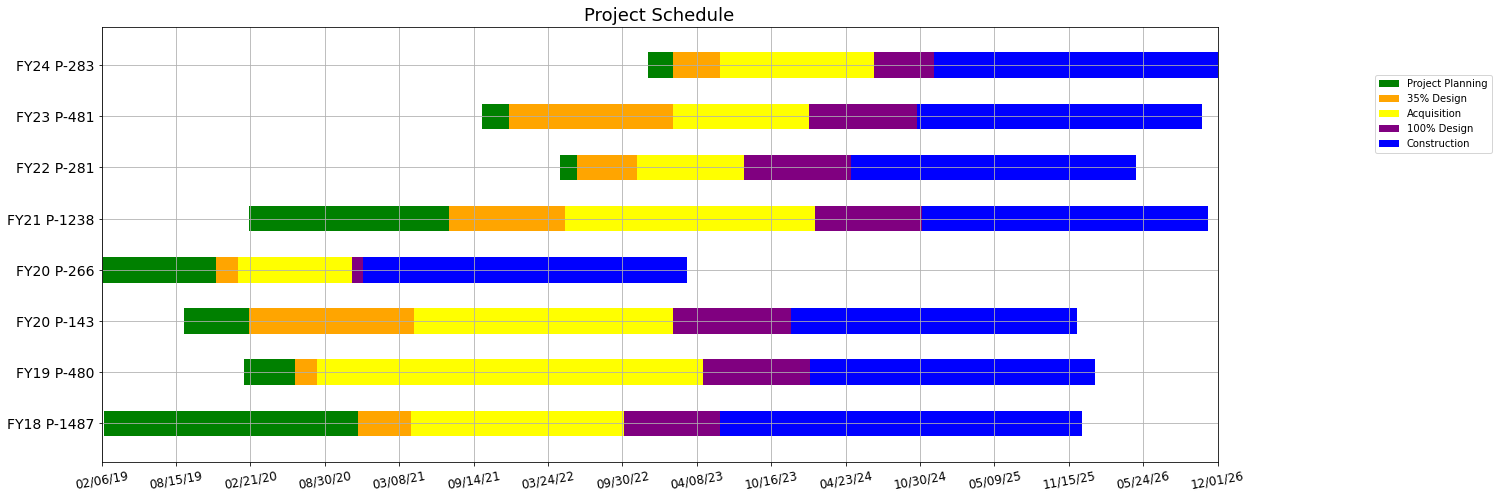

In [12]:
# Horizontal bar plot with gaps
colors = ['Green', 'Orange', 'Yellow', 'Purple', 'Blue']
date_range = df_vis.iloc[-1]['Construction Completion Date (CCD)'] - df_vis.iloc[0]['Final Design Authority (FDA)']
date_range = date_range.days
fig, ax = plt.subplots(1, figsize = (20,8))
h = 10
for index, row in df_vis.iterrows():
    ax.broken_barh([(row['Start'],row['B1']),(row['Start'] + row['B1'],row['B2']),(row['Start'] + row['B1'] + row['B2'],row['B3']),(row['Start'] + row['B1'] + row['B2'] + row['B3'],row['B4']),(row['Start'] + row['B1'] + row['B2'] + row['B3'] + row['B4'],row['B5'])], (h, 10),facecolors=colors)
    h += 20
ax.set_ylim(0, 170)
ax.set_xlim(0, date_range)

#label yaxis
ax.set_yticks([15, 35, 55, 75, 95, 115, 135, 155]) 
ax.set_yticklabels(labels=df_vis['Vis Title'], fontsize = 14)

#label xaxis
xticks = np.arange(0, date_range, date_range/15)
xticks = np.append(xticks, date_range)
xticks_labels = pd.date_range(df_vis.iloc[0]['Final Design Authority (FDA)'], end=df_vis.iloc[-1]['Construction Completion Date (CCD)'], periods = len(xticks)).strftime("%m/%d/%y")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels, rotation = 10, fontsize = 12)

#add legend
c_dict = {'Project Planning':'Green', '35% Design':'Orange', 'Acquisition':'Yellow',
          '100% Design':'Purple', 'Construction':'Blue'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements, bbox_to_anchor = (1.25, 0.8), loc='center right')

#add title
plt.title('Project Schedule', fontsize = 18)

ax.grid(True)
plt.show()

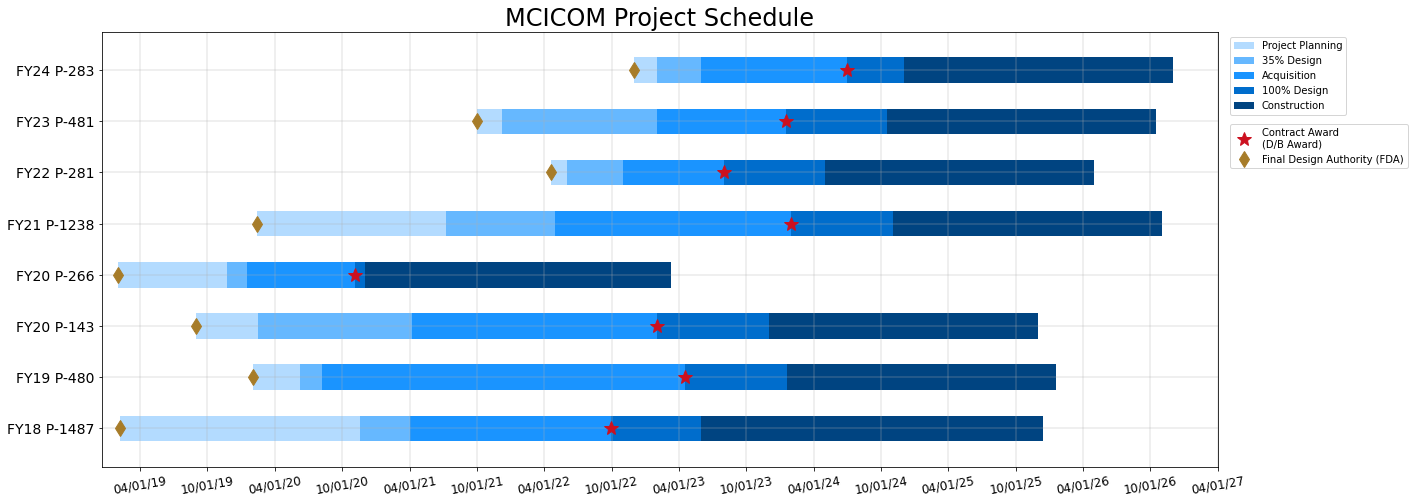

In [13]:
# Horizontal bar plot with gaps
#specify colors
colors = ['#b3dbff','#66b8ff', '#1a94ff', '#006dcc', '#004481']

#calculate the number of days from start to end
date_range = max(df_vis['Construction Completion Date (CCD)']) - min(df_vis['Final Design Authority (FDA)'])
date_range = date_range.days

#initialize plot and set height
fig, ax = plt.subplots(1, figsize = (20,8))
h = 10

#add bars to plot
for index, row in df_vis.iterrows():
    ax.broken_barh([(row['Start'],row['B1']),(row['Start'] + row['B1'],row['B2']),(row['Start'] + row['B1'] + row['B2'],row['B3']),(row['Start'] + row['B1'] + row['B2'] + row['B3'],row['B4']),(row['Start'] + row['B1'] + row['B2'] + row['B3'] + row['B4'],row['B5'])], (h, 10),facecolors=colors)
    c_award = row['Start'] + row['B1'] + row['B2'] + row['B3']
    ax.plot(c_award,h+5, color = '#cc101f', markersize = 15, marker ='*')
    ax.plot(row['Start'],h+5, color = '#a77c29', markersize = 12, marker ='d')
    
    h += 20

#set axis limites    
ax.set_ylim(0, 170)
ax.set_xlim(-45, date_range)

#label yaxis
ax.set_yticks([15, 35, 55, 75, 95, 115, 135, 155]) 
ax.set_yticklabels(labels=df_vis['Vis Title'], fontsize = 14)

#label xaxis
tick_dates = pd.date_range(date(2019, 4, 1), end= date(2027, 4, 1), freq = '6MS')
xticks = tick_dates - min(df_vis['Final Design Authority (FDA)'])
xticks = xticks.days
xticks_labels = tick_dates.strftime("%m/%d/%y")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels, rotation = 10, fontsize = 12)

#add legend
c_dict = {'Project Planning':'#b3dbff', '35% Design':'#66b8ff', 'Acquisition':'#1a94ff',
          '100% Design':'#006dcc', 'Construction':'#004481'}

red_star = mlines.Line2D([], [], color='#cc101f', marker='*', linestyle='None',
                          markersize=15, label='Contract Award \n(D/B Award)')
gold_diamond = mlines.Line2D([], [], color='#a77c29', marker='d', linestyle='None',
                          markersize=12, label='Final Design Authority (FDA)')

f_legend = plt.legend(handles=[red_star, gold_diamond], bbox_to_anchor = (1.175, .8), loc='upper right')

plt.gca().add_artist(f_legend)

legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
s_legend = plt.legend(handles=legend_elements, bbox_to_anchor = (1.12, 1), loc='upper right')


#add title
plt.title('MCICOM Project Schedule', fontsize = 24)

ax.grid(True, linewidth = 0.4)
plt.savefig('website/static/images/project_schedule.png', bbox_inches="tight")
plt.show()

In [14]:
plt.savefig('website/static/images/main_image.png')
#change x-axis to FY{} Q1 / FY{} Q3 -- add construction complete symbol -- solid line toggle for dashboard

<Figure size 432x288 with 0 Axes>